# MOUAD ELBOUCHRAOUI            _                    


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV,cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

## Chargement des données et prétraitement

In [2]:
df = pd.read_csv("WildFires.csv", delimiter=";")
df.head()

,NDVI,LST,BURNED_AREA,CLASS
0,0.506782,14584.272727,4.692308,no_fire
1,0.522150,14655.833333,5.000000,no_fire
2,0.682284,14780.000000,5.000000,fire
3,NaN,13298.500000,3.500000,no_fire
4,NaN,14743.000000,5.000000,no_fire


In [3]:
df.describe()

,NDVI,LST,BURNED_AREA
count,1636.000000,1668.000000,1667.000000
mean,0.555346,14620.883140,4.674627
std,0.093223,365.701396,0.584025
min,0.030735,13137.000000,3.000000
25%,0.500080,14402.670779,4.519508
50%,0.564792,14644.124439,4.916339
75%,0.622227,14875.508123,5.000000
max,0.781723,15611.570513,9.000000


In [122]:
df.shape

(1713, 4)

In [4]:
# Affichage du nombre de valeurs NaN par colonne
print("Nombre de valeurs NaN par colonne :")
print(df.isna().sum())
# Supprimer les valeurs dupliquées
df.drop_duplicates(inplace=True)

# Interpolation
from scipy.interpolate import interp1d

# Remplacer les valeurs manquantes par interpolation linéaire pour toutes les colonnes numériques
for column in df.select_dtypes(include='number').columns:
    df[column].interpolate(method='linear', inplace=True)

# Extrapolation pour toutes les colonnes numériques
for column in df.select_dtypes(include='number').columns:
    f = interp1d(df.index, df[column], fill_value="extrapolate")
    df[column] = f(df.index)

# Maintenant, les données sont nettoyées
print("après le preprocising:")
print(df)

Nombre de valeurs NaN par colonne :
NDVI           77
LST            45
BURNED_AREA    46
CLASS           0
dtype: int64
après le preprocising:
          NDVI           LST  BURNED_AREA    CLASS
0     0.506782  14584.272727     4.692308  no_fire
1     0.522150  14655.833333     5.000000  no_fire
2     0.682284  14780.000000     5.000000     fire
3     0.651151  13298.500000     3.500000  no_fire
4     0.620017  14743.000000     5.000000  no_fire
...        ...           ...          ...      ...
1706  0.486338  14325.000000     5.000000  no_fire
1708  0.621721  14406.000000     5.000000  no_fire
1709  0.709715  14330.400000     4.851852  no_fire
1710  0.613000  14751.500000     3.000000     fire
1712  0.549497  14269.777778     5.000000     fire

[1486 rows x 4 columns]


/tmp/ipykernel_73991/2001893920.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].interpolate(method='linear', inplace=True)


In [5]:
#features
x = df[["NDVI", "LST", "BURNED_AREA"]]
#Target
y = df[["CLASS"]]

In [6]:
#data Processing
scaler = StandardScaler()
x = scaler.fit_transform(x)

#String to num
y = y["CLASS"].replace({"no_fire":0, "fire":1})

/tmp/ipykernel_73991/3268691353.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y["CLASS"].replace({"no_fire":0, "fire":1})


In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 44, shuffle = True)
X_train.shape, X_test.shape 

((995, 3), (491, 3))

# cross-validation

In [9]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# SVM

In [10]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}
grid_search = GridSearchCV(SVC(), param_grid, cv=kf)
scores = cross_val_score(grid_search, X_train, y_train, cv=kf)
print(f"Cross-validation scores for SVC: {scores}")

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_pred, y_test))

Cross-validation scores for SVC: [0.80904523 0.78894472 0.7839196  0.78894472 0.76884422]
              precision    recall  f1-score   support

           0       0.99      0.77      0.87       481
           1       0.05      0.60      0.10        10

    accuracy                           0.77       491
   macro avg       0.52      0.69      0.48       491
weighted avg       0.97      0.77      0.85       491



Accuracy:  0.769857433808554
Precision:  0.6
Recall:  0.05217391304347826
F1:  0.096
Predicted Value for SVCModel :  [0 0 0 0 0 0 0 0 0 0]
Confusion Matrix is : 
 [[372   4]
 [109   6]]


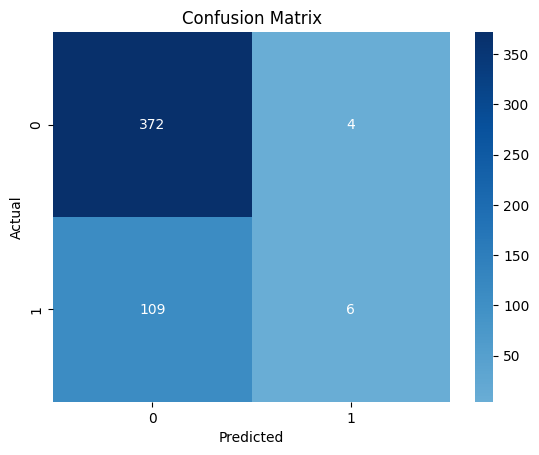

In [11]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

print("Predicted Value for SVCModel : ", y_pred[:10])
classification_report
#Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is : \n", CM)

#drawing
sns.heatmap(CM, center = True, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Random Forest Classifier

In [12]:
# Define hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 10, None],  
    'max_features': ['sqrt', 'log2', None],  # None for considering all features
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],  # Criterion for splitting
    'class_weight': [None, 'balanced']  # Balancing classes or not
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=15, cv=5)

scores = cross_val_score(random_search, X_train, y_train, cv=kf)
print(f"Cross-validation scores for RF: {scores}")

# Fit the model
random_search.fit(X_train, y_train)

# Get best model and parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate best model
y_pred = best_model.predict(X_test)

print(classification_report(y_pred, y_test))


Cross-validation scores for RF: [0.80904523 0.7839196  0.7839196  0.79899497 0.77889447]
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       443
           1       0.24      0.58      0.34        48

    accuracy                           0.78       491
   macro avg       0.60      0.69      0.61       491
weighted avg       0.88      0.78      0.82       491



Accuracy:  0.7820773930753564
Precision:  0.5833333333333334
Recall:  0.24347826086956523
F1:  0.34355828220858897
Predicted Value for RandomForest :  [0 1 0 0 0 0 0 0 0 0]
Confusion Matrix is : 
 [[356  20]
 [ 87  28]]


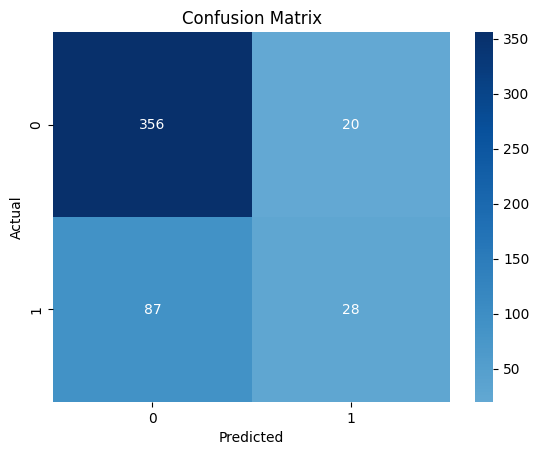

In [13]:
# y_pred = RandomForestClassifierModel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

print("Predicted Value for RandomForest : ", y_pred[:10])
#Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is : \n", CM)

#drawing
sns.heatmap(CM, center = True, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# LogisticRegression

In [14]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
}

# Create GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=skf, scoring='accuracy')

# Cross Validation
scores = cross_val_score(grid_search, X_train, y_train, cv=skf)
print(f"Cross-validation scores for LogisticRegression: {scores}")

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_score)

# Use the best parameters to train your model
best_lr = LogisticRegression(random_state=42, **best_params)
best_lr.fit(X_train, y_train)


Cross-validation scores for LogisticRegression: [0.78894472 0.77889447 0.79899497 0.77889447 0.78894472]
Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy: 0.7879396984924624


LogisticRegression(C=1, random_state=42, solver='liblinear')

              precision    recall  f1-score   support

           0       0.97      0.78      0.86       472
           1       0.08      0.47      0.13        19

    accuracy                           0.76       491
   macro avg       0.53      0.62      0.50       491
weighted avg       0.94      0.76      0.84       491

Accuracy:  0.7637474541751528
Precision:  0.47368421052631576
Recall:  0.0782608695652174
F1:  0.13432835820895522
Predicted Value for logistic regression :  [0 1 0 0 0 0 0 0 0 0]
Confusion Matrix is : 
 [[366  10]
 [106   9]]


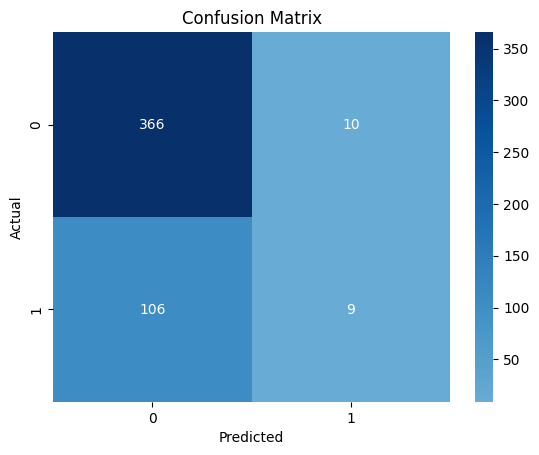

In [15]:
lr_pred = best_lr.predict(X_test)
accuracy = accuracy_score(y_test, lr_pred)
precision = precision_score(y_test, lr_pred)
recall = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
print(classification_report(lr_pred, y_test))
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

print("Predicted Value for logistic regression : ", lr_pred[:10])
#Confusion Matrix
CM = confusion_matrix(y_test, lr_pred)
print("Confusion Matrix is : \n", CM)

#drawing
sns.heatmap(CM, center = True, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#old accuracy value 0.8144876325088339

# Decision Tree

In [16]:
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
# Cross Validation
scores = cross_val_score(grid_search, X_train, y_train, cv=5)
print(f"Cross-validation scores for DecisionTreeClassifier: {scores}")

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

Cross-validation scores for DecisionTreeClassifier: [0.73869347 0.80904523 0.78894472 0.76884422 0.80904523]


Accuracy:  0.7841140529531568
Precision:  0.6
Recall:  0.23478260869565218
F1:  0.3375
Predicted Value for Decision Tree :  [0 1 0 0 0 0 0 0 0 0]
Confusion Matrix is : 
 [[358  18]
 [ 88  27]]


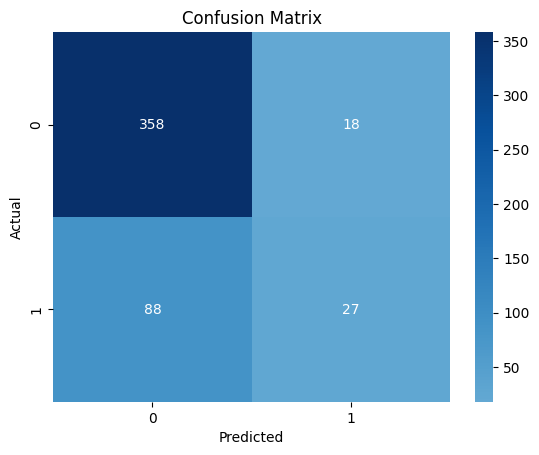

In [17]:
dt_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, dt_pred)
precision = precision_score(y_test, dt_pred)
recall = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

print("Predicted Value for Decision Tree : ", lr_pred[:10])
#Confusion Matrix
CM = confusion_matrix(y_test, dt_pred)
print("Confusion Matrix is : \n", CM)

#drawing
sns.heatmap(CM, center = True, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# MLPClassifier

/home/mouad/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mouad/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mouad/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validation scores for MLPClassifier: [0.79396985 0.78894472 0.77386935 0.76884422 0.80904523]
Accuracy:  0.7433808553971487
Precision:  0.4098360655737705
Recall:  0.21739130434782608
F1:  0.2840909090909091
Predicted Value for MLP :  [0 1 0 0 0 0 0 0 0 0]
Confusion Matrix is : 
 [[340  36]
 [ 90  25]]


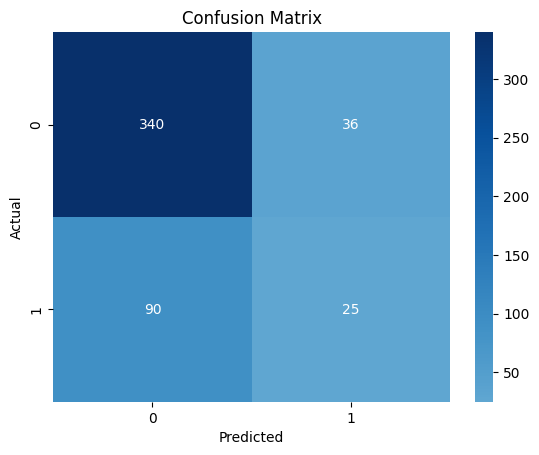

In [18]:
mlp = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1000, random_state=42)

# Cross Validation
scores = cross_val_score(mlp, X_train, y_train, cv=5)
print(f"Cross-validation scores for MLPClassifier: {scores}")

# Train the model
mlp.fit(X_train, y_train)

# Predictions
mlp_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, mlp_pred)
precision = precision_score(y_test, mlp_pred)
recall = recall_score(y_test, mlp_pred)
f1 = f1_score(y_test, mlp_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

print("Predicted Value for MLP : ", lr_pred[:10])
#Confusion Matrix
CM = confusion_matrix(y_test, mlp_pred)
print("Confusion Matrix is : \n", CM)

#drawing
sns.heatmap(CM, center = True, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

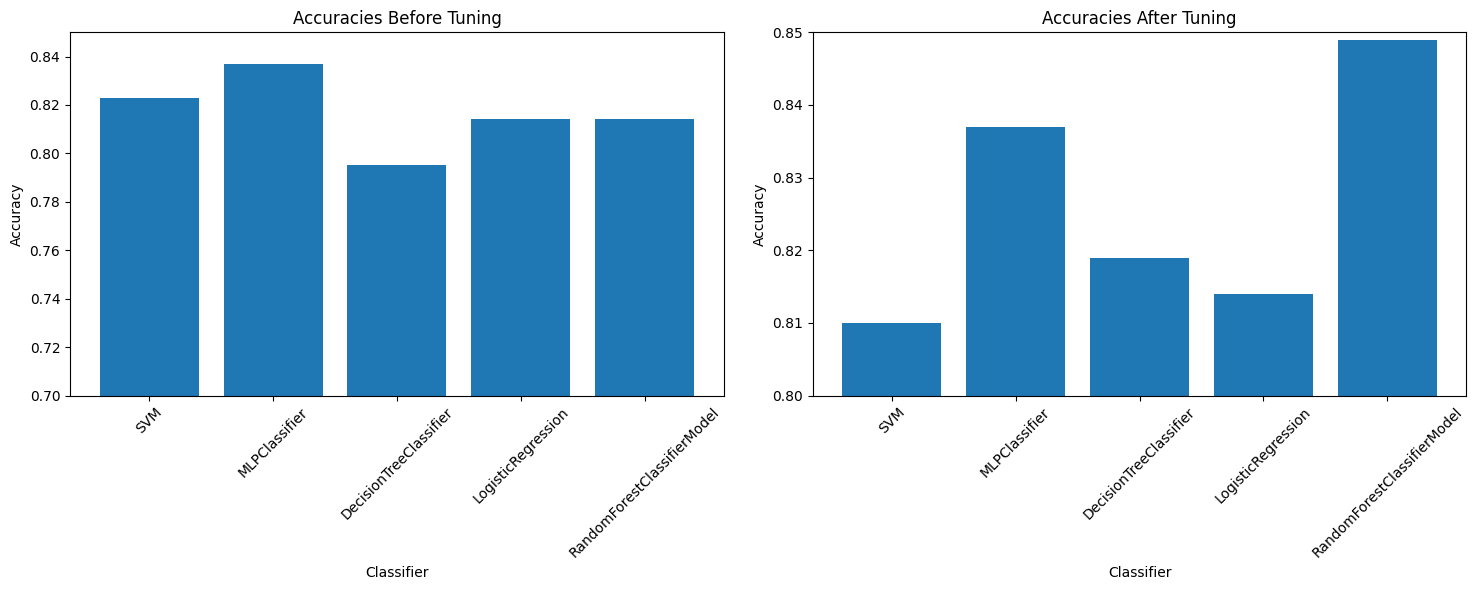

In [19]:
# avant optimisation
classifiers1 = ['SVM', 'MLPClassifier', 'DecisionTreeClassifier', 'LogisticRegression', 'RandomForestClassifierModel']
accuracies1 = [0.823, 0.837, 0.795, 0.814, 0.814]

# apres l'optimisation
classifiers2 = ['SVM', 'MLPClassifier', 'DecisionTreeClassifier', 'LogisticRegression', 'RandomForestClassifierModel']
accuracies2 = [0.810, 0.837, 0.819, 0.814, 0.849]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))


axes[0].bar(classifiers1, accuracies1)
axes[0].set_title('Accuracies Before Tuning')
axes[0].set_xlabel('Classifier')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0.7, 0.85)
axes[0].tick_params(axis='x', rotation=45)


axes[1].bar(classifiers2, accuracies2)
axes[1].set_title('Accuracies After Tuning')
axes[1].set_xlabel('Classifier')
axes[1].set_ylabel('Accuracy')
axes[1].set_ylim(0.8, 0.85)
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()

# Show plot
plt.show()
